# Process Tail Simulation Results for tSNE

## Peek at a Sample Result

In [1]:
import os, pickle

results_dir = r"D:\2026-01-31 Vol"

sample_file = "Cap (5M) -    ATR (1.0) -    EBITABL (0.125) -    XS_Kurt (3032) -    Ded (100K) -    LR (0.7) -    Vol (0.15) -    250K Sims -    50 Yrs.pkl"

file_path = os.path.join(results_dir, sample_file)
with open(file_path, "rb") as f:
    loaded_sample_data = pickle.load(f)

In [2]:
dir(loaded_sample_data)

['__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'aggregated_results',
 'annual_losses',
 'bootstrap_confidence_intervals',
 'config',
 'convergence',
 'execution_time',
 'final_assets',
 'growth_rates',
 'insurance_recoveries',
 'metrics',
 'performance_metrics',
 'retained_losses',
 'ruin_probability',
 'statistical_summary',
 'summary',
 'summary_report',
 'time_series_aggregation']

In [3]:
loaded_sample_data.config

SimulationConfig(n_simulations=250000, n_years=50, n_chains=4, parallel=False, n_workers=None, chunk_size=25000, use_float32=True, cache_results=False, checkpoint_interval=None, progress_bar=True, seed=3967515427, use_enhanced_parallel=True, monitor_performance=True, adaptive_chunking=True, shared_memory=True, enable_trajectory_storage=False, trajectory_storage_config=None, enable_advanced_aggregation=True, aggregation_config=None, generate_summary_report=False, summary_report_format='markdown', compute_bootstrap_ci=False, bootstrap_confidence_level=0.95, bootstrap_n_iterations=10000, bootstrap_method='percentile', ruin_evaluation=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50], working_capital_pct=0.0, insolvency_tolerance=10000)

In [4]:
loaded_sample_data

SimulationResults(final_assets=array([9.8975620e+06, 1.2131475e+07, 1.1347783e+07, ..., 1.4206634e+07,
       1.2432783e+07, 1.0611424e+07], shape=(250000,), dtype=float32), annual_losses=array([[5.94092734e+04, 1.14302805e+05, 0.00000000e+00, ...,
        2.05765984e+05, 0.00000000e+00, 4.61170195e+04],
       [2.21719531e+04, 1.48433094e+05, 2.40277250e+05, ...,
        3.19997688e+05, 1.42638188e+05, 1.36203094e+05],
       [8.24570391e+04, 8.35751797e+04, 7.20194141e+04, ...,
        2.81462406e+05, 2.14248094e+05, 5.96477812e+04],
       ...,
       [0.00000000e+00, 2.36190586e+04, 0.00000000e+00, ...,
        3.52099344e+05, 2.86631125e+05, 3.87958531e+05],
       [0.00000000e+00, 6.00816211e+04, 1.46466750e+06, ...,
        2.88220250e+05, 1.53330713e+04, 1.15187562e+05],
       [1.27002891e+04, 0.00000000e+00, 0.00000000e+00, ...,
        9.06371875e+04, 1.84260094e+05, 3.81620352e+04]],
      shape=(250000, 50), dtype=float32), insurance_recoveries=array([[0.0000000e+00, 0.000

In [5]:
len(loaded_sample_data.final_assets[loaded_sample_data.final_assets <= 10_000]) / len(loaded_sample_data.final_assets)

0.0

In [6]:
sorted(loaded_sample_data.final_assets)[:]

[np.float32(7.851692e+06),
 np.float32(7.9296195e+06),
 np.float32(7.958563e+06),
 np.float32(7.978711e+06),
 np.float32(7.99584e+06),
 np.float32(8.0511985e+06),
 np.float32(8.0727095e+06),
 np.float32(8.0748295e+06),
 np.float32(8.0895365e+06),
 np.float32(8.16939e+06),
 np.float32(8.2250925e+06),
 np.float32(8.2261985e+06),
 np.float32(8.2302855e+06),
 np.float32(8.2318565e+06),
 np.float32(8.273155e+06),
 np.float32(8.3534075e+06),
 np.float32(8.386845e+06),
 np.float32(8.3883695e+06),
 np.float32(8.446731e+06),
 np.float32(8.454056e+06),
 np.float32(8.469042e+06),
 np.float32(8.471426e+06),
 np.float32(8.480165e+06),
 np.float32(8.492595e+06),
 np.float32(8.499164e+06),
 np.float32(8.506186e+06),
 np.float32(8.506695e+06),
 np.float32(8.517119e+06),
 np.float32(8.528672e+06),
 np.float32(8.531232e+06),
 np.float32(8.53275e+06),
 np.float32(8.543262e+06),
 np.float32(8.544667e+06),
 np.float32(8.557154e+06),
 np.float32(8.576927e+06),
 np.float32(8.589899e+06),
 np.float32(8.596443

## Load All Results

### Get all the file paths and set up results parsing

In [7]:
import pickle
import re
import numpy as np
import pandas as pd

from pathlib import Path
from PIL import Image
from scipy.stats import skew, kurtosis
from time import perf_counter
from tqdm.auto import tqdm

from ergodic_insurance.monte_carlo import SimulationResults


def _parse_number(text):
    text = text.strip().replace(",", "")
    m = re.fullmatch(r'([+-]?\d+(?:\.\d+)?)([KMB])?$', text, re.I)
    if not m:
        # fallback: plain int/float or leave as-is
        try:
            return int(text)
        except ValueError:
            try:
                return float(text)
            except ValueError:
                return text
    num = float(m.group(1))
    mult = {"K": 1_000, "M": 1_000_000, "B": 1_000_000_000}.get((m.group(2) or "").upper(), 1)
    val = num * mult
    return int(val) if val.is_integer() else val


def parse_config_key(key: str) -> dict:
    parts = re.split(r"\s*-\s*", key.strip())
    out = {}
    for part in parts:
        if not part:
            continue

        # e.g. "Cap (100M)"
        m = re.match(r"^([A-Za-z_%]+)\s*\(\s*([^)]+)\s*\)$", part)
        if m:
            out[m.group(1)] = _parse_number(m.group(2))
            continue

        # e.g. "0K Sims" or "50 Yrs"
        m = re.match(r"^([+-]?\d+(?:\.\d+)?)\s*([KMB])?\s*([A-Za-z_]+)$", part)
        if m:
            value = _parse_number((m.group(1) or "") + (m.group(2) or ""))
            out[m.group(3)] = value
            continue

        # flags like "NOINS"
        if part.upper() == "NOINS":
            out["NOINS"] = True
        else:
            out["NOINS"] = False

    return out

results_dir = Path(results_dir)

# sample_files = "Cap (10M) - Ded (250K)*.pkl" # Load a subset for testing
sample_files = "*.pkl" # Load all files

pkl_paths = sorted(results_dir.glob(sample_files))

qs = np.arange(0.01, 1.00, 0.01) # Growth Rate Quantiles

all_configurations = {}

# Create an empty DataFrame with specified columns
df_qs = [0.01, 0.05] + np.arange(0.1, 0.8, 0.1).tolist() + [0.75, 0.8, 0.85, 0.9, 0.95, 0.99]
column_names = [key for key in parse_config_key(sample_file).keys() if key != 'Sims']
column_names += ['growth_rate_mean', 'growth_rate_std', 'growth_rate_cv', 'growth_rate_skewness',
                'growth_rate_kurtosis', 'growth_rate_hyperskewness', 'growth_rate_hyperkurtosis']
column_names += [f'growth_rate_q{q*100:.0f}' for q in df_qs]
df_cte = [0.005, 0.01, 0.05]
column_names += [f'growth_rate_cte_q{q*100:.1f}' for q in df_cte]
column_names += [f'risk_of_ruin_{age}' for age in loaded_sample_data.ruin_probability.keys()]
# column_names += ['risk_of_ruin']
all_df = pd.DataFrame(columns=column_names)
column_names

['Cap',
 'ATR',
 'EBITABL',
 'XS_Kurt',
 'Ded',
 'LR',
 'Vol',
 'NOINS',
 'growth_rate_mean',
 'growth_rate_std',
 'growth_rate_cv',
 'growth_rate_skewness',
 'growth_rate_kurtosis',
 'growth_rate_hyperskewness',
 'growth_rate_hyperkurtosis',
 'growth_rate_q1',
 'growth_rate_q5',
 'growth_rate_q10',
 'growth_rate_q20',
 'growth_rate_q30',
 'growth_rate_q40',
 'growth_rate_q50',
 'growth_rate_q60',
 'growth_rate_q70',
 'growth_rate_q75',
 'growth_rate_q80',
 'growth_rate_q85',
 'growth_rate_q90',
 'growth_rate_q95',
 'growth_rate_q99',
 'growth_rate_cte_q0.5',
 'growth_rate_cte_q1.0',
 'growth_rate_cte_q5.0',
 'risk_of_ruin_5',
 'risk_of_ruin_10',
 'risk_of_ruin_15',
 'risk_of_ruin_20',
 'risk_of_ruin_25',
 'risk_of_ruin_30',
 'risk_of_ruin_35',
 'risk_of_ruin_40',
 'risk_of_ruin_45',
 'risk_of_ruin_50']

### Parse data for a sample row (test the parser)

In [8]:
def parse_row_data(sample_file, loaded_sample_data):
    row_data = {key: val for (key, val) in parse_config_key(sample_file).items() if key != 'Sims'}
    row_data['growth_rate_mean'] = loaded_sample_data.growth_rates.mean()
    row_data['growth_rate_std'] = loaded_sample_data.growth_rates.std(ddof=1)
    row_data['growth_rate_cv'] = row_data['growth_rate_std'] / row_data['growth_rate_mean']
    row_data['growth_rate_skewness'] = skew(loaded_sample_data.growth_rates)
    row_data['growth_rate_kurtosis'] = kurtosis(loaded_sample_data.growth_rates)  # Excess (-3)
    standardized_data = (loaded_sample_data.growth_rates - row_data['growth_rate_mean']) / row_data['growth_rate_std']
    row_data['growth_rate_hyperskewness'] = np.mean(standardized_data**5)
    row_data['growth_rate_hyperkurtosis'] = np.mean(standardized_data**6)
    row_data = row_data | {f'growth_rate_q{q*100:.0f}': val for q, val in zip(df_qs, np.quantile(loaded_sample_data.growth_rates, df_qs))}
    row_data = row_data | {f'growth_rate_cte_q{q*100:.1f}': val for q, val in zip(df_cte, np.quantile(loaded_sample_data.growth_rates, df_cte))}
    row_data = row_data | {f'risk_of_ruin_{age}': ror for (age, ror) in loaded_sample_data.ruin_probability.items()}
    return row_data
    # row_data['risk_of_ruin'] = len(loaded_sample_data.final_assets[loaded_sample_data.final_assets <= 10_000]) / len(loaded_sample_data.final_assets)

sample_row_data = parse_row_data(sample_file, loaded_sample_data)

In [9]:
import pickle
import re
import numpy as np
import pandas as pd

from pathlib import Path
from PIL import Image
from scipy.stats import skew, kurtosis
from time import perf_counter
from tqdm.auto import tqdm

from ergodic_insurance.monte_carlo import SimulationResults

parquet_df = r"cache\\all_df.parquet"
parsed_params_file = r"cache\\parsed_params_by_key.pkl"

# Ensure cache folder exists (to_parquet won't create it)
Path(parquet_df).parent.mkdir(parents=True, exist_ok=True)
Path(parsed_params_file).parent.mkdir(parents=True, exist_ok=True)

all_df = pd.DataFrame()

try:
    # Attempt to load from parquet file
    all_df = pd.read_parquet(parquet_df, engine='pyarrow')
    parsed_params_by_key = pd.read_pickle(parsed_params_file)

    # If the parquet was created before the df-building fix, it may have 0 rows/cols.
    # Treat that as cache-miss and rebuild from pickles.
    if len(all_df) == 0 and len(parsed_params_by_key) > 0 and pkl_paths:
        raise ValueError("Cached parquet is empty; rebuilding from pickle files.")

    print(f"Loaded {len(all_df)} rows from {parquet_df} and {len(parsed_params_by_key)} configurations from {parsed_params_file}.")
except Exception as e:
    print(f"Parsing simulation pickle files (cache miss: {e})")

    if not pkl_paths:
        print(f"No pickle files found in {results_dir}.")
    else:
        try:
            iterator = tqdm(pkl_paths, desc="Processing pickle files", unit="file")
        except Exception:
            iterator = pkl_paths  # fallback without progress bar

        start_time = perf_counter()
        rows = []
        all_configurations = {}
        for idx, path in enumerate(iterator, 1):
            if idx > 1:
                elapsed = perf_counter() - start_time
                avg = elapsed / (idx - 1)
                remaining = avg * (len(pkl_paths) - (idx - 1))
                if hasattr(iterator, "set_postfix"):
                    iterator.set_postfix(avg_s=f"{avg:.2f}", eta_s=f"{remaining:.1f}")
            try:
                with open(path, "rb") as f:
                    one_config = pickle.load(f)
                    growth_rate = one_config.growth_rates.mean()
                    growth_rate_ci = {str(q): val for q, val in zip(qs, np.quantile(one_config.growth_rates, qs))}
                    ror = one_config.ruin_probability

                    # Update the dictionary
                    all_configurations[path.stem] = {
                        "growth_rate": growth_rate,
                        "growth_rate_ci": growth_rate_ci,
                        "risk_of_ruin": ror,
                        # "annual_losses": one_config.annual_losses,
                    }

                    # Collect the row data (don't concat into a 0-column df)
                    parsed_row = parse_row_data(path.stem, one_config)
                    rows.append(parsed_row)
            except Exception as e:
                print(f"Skipping {path.name}: {e}")

        print(f"Loaded {len(all_configurations)} pickle files into all_configurations.")

        # Build DataFrame once (fast + preserves columns)
        all_df = pd.DataFrame(rows)
        if "column_names" in globals() and isinstance(column_names, list) and column_names:
            # Keep your preferred column order, but don't drop unexpected columns
            for c in column_names:
                if c not in all_df.columns:
                    all_df[c] = np.nan
            extra_cols = [c for c in all_df.columns if c not in column_names]
            all_df = all_df[column_names + extra_cols]

        print(f"all_df shape before write: {all_df.shape}")
        print(f"First columns: {list(all_df.columns)[:10]}")

        # parsed_params_by_key merges parsed filename params with computed metrics
        parsed_params_by_key = {k: (parse_config_key(k) | all_configurations[k]) for k in all_configurations.keys()}

        # Replace 'None' string values in X_Th_%le with 0.0 and coerce to float if possible
        if 'X_Th_%le' in all_df.columns:
            all_df.loc[all_df['X_Th_%le'].eq('None'), 'X_Th_%le'] = 0.0
            try:
                all_df['X_Th_%le'] = all_df['X_Th_%le'].astype(float)
            except Exception:
                pass

        # Save all_df to a parquet file
        print(f"Writing {len(all_df)} rows to {parquet_df}...")
        all_df.to_parquet(parquet_df, engine='pyarrow', index=False)

        # Save parsed_params_by_key to a pickle file
        with open(parsed_params_file, "wb") as f:
            pickle.dump(parsed_params_by_key, f, protocol=pickle.HIGHEST_PROTOCOL)
        print(f"Wrote {len(parsed_params_by_key)} configurations to {parsed_params_file}")

Parsing simulation pickle files (cache miss: [Errno 2] No such file or directory: 'cache\\\\all_df.parquet')


Processing pickle files:   0%|          | 0/52 [00:00<?, ?file/s]

Loaded 52 pickle files into all_configurations.
all_df shape before write: (52, 44)
First columns: ['Cap', 'ATR', 'EBITABL', 'XS_Kurt', 'Ded', 'LR', 'Vol', 'NOINS', 'growth_rate_mean', 'growth_rate_std']
Writing 52 rows to cache\\all_df.parquet...
Wrote 52 configurations to cache\\parsed_params_by_key.pkl


In [10]:
# No Limits are expected here since it's unlimited policies
# Replace the first failing comprehension with this safe version:
all_lims = sorted({sc['Pol_Lim'] for sc in parsed_params_by_key.values() if 'Pol_Lim' in sc})
all_lims

[]

In [11]:
# Replace the first failing comprehension with this safe version:
all_lims = sorted({sc['Ded'] for sc in parsed_params_by_key.values() if 'Ded' in sc})
all_lims

[0, 100000, 250000, 500000]

In [12]:
# Replace the first failing comprehension with this safe version:
all_keys = set().union(*(sc.keys() for sc in parsed_params_by_key.values()))
all_keys

{'ATR',
 'Cap',
 'Ded',
 'EBITABL',
 'LR',
 'NOINS',
 'Sims',
 'Vol',
 'XS_Kurt',
 'Yrs',
 'growth_rate',
 'growth_rate_ci',
 'risk_of_ruin'}

In [13]:
for key in all_keys:
    all_key_vals = sorted({str(sc[key]) for sc in parsed_params_by_key.values() if key in sc and type(sc[key]) not in (list, dict, set)})
    if all_key_vals != []:
        print(f"{key}: {all_key_vals}")
    all_key_vals = {type(sc[key]) for sc in parsed_params_by_key.values() if key in sc and type(sc[key]) in (list, dict, set)}
    if all_key_vals != set():
        print(f"{key}: {all_key_vals}")

growth_rate_ci: {<class 'dict'>}
Ded: ['0', '100000', '250000', '500000']
ATR: ['0.8', '1', '1.2']
LR: ['0.7']
Sims: ['250000']
growth_rate: ['0.0029242056543073804', '0.00573240103817234', '0.007925591425781722', '0.009901056823513697', '0.010319924428490399', '0.011264257126016163', '0.011383713097690196', '0.011428993252137675', '0.01235018899164156', '0.012447027036668733', '0.012462030929993838', '0.012489070057686302', '0.013492896996431053', '0.013572838743420319', '0.013577207296296955', '0.01454634271437436', '0.014645017437059782', '0.014836467983921131', '0.015949560139084235', '0.016021747620175594', '0.017398644168145953', '0.017573150727130473', '0.017948903626349176', '0.01809021641436685', '0.018392144908331333', '0.018480445345915853', '0.01850228127153963', '0.019615850829657167', '0.019750843117544426', '0.02140414736019075', '0.02144663469339162', '0.02348974700745195', '0.023496203240312635', '0.0235700132900998', '0.028623349500998856', '0.028707172839321195', '0.

In [14]:
ins_only_vals = [val for val in parsed_params_by_key.values() if val.get('NOINS', False) is False]
len(ins_only_vals)

30

In [15]:
lr = sorted(set(c['LR'] for c in ins_only_vals))
lr

[0.7]

In [16]:
# Subset to a single volatility parameter for plotting (like in the full sim)
parsed_params_by_key = {k: v for k, v in parsed_params_by_key.items() if v['Vol'] == 0.15}

In [17]:
# No-Insurance Scenarios
noins_scenarios = {k: v for k, v in parsed_params_by_key.items() if v.get("NOINS")}

## Display Plots

### Asset Turnover Ratio vs Time Average Growth Rate

Saved: output\option3_multiples_ebit_0.125.png


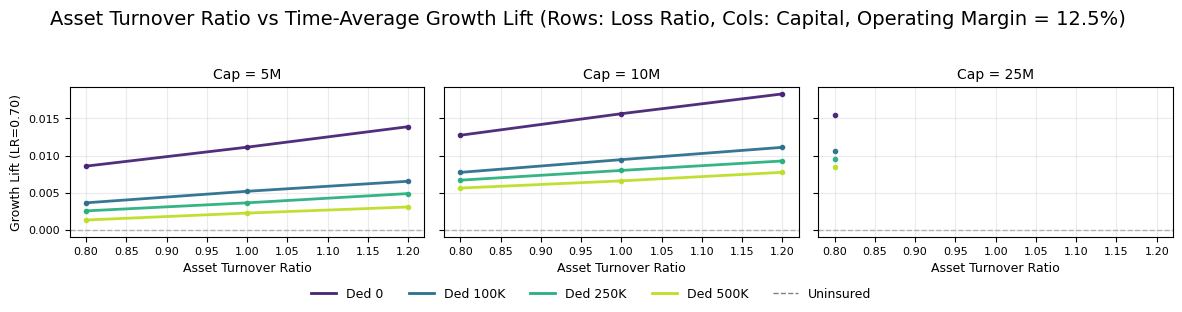

Created 1 figures for Option 3


In [18]:
# Option 3: Small multiples with discrete operating margin values
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from pathlib import Path
from collections import defaultdict

all_scens = parsed_params_by_key | noins_scenarios

if not isinstance(globals().get("all_scens"), dict) or not all_scens:
    raise RuntimeError("all_scens is missing or empty.")

def to_float(x):
    try:
        return float(x)
    except Exception:
        return np.nan

# Parse scenarios
sc_list = []
for k, v in all_scens.items():
    cap = to_float(v.get("Cap"))
    atr = to_float(v.get("ATR"))
    ebit = to_float(v.get("EBITABL"))
    gr = to_float(v.get("growth_rate"))
    ded = to_float(v.get("Ded"))
    lr_raw = v.get("LR", np.nan)
    lr_f = to_float(lr_raw)
    if np.isfinite(lr_f) and lr_f > 1.0:
        lr_f = lr_f / 100.0
    noins = bool(v.get("NOINS", False))

    if not np.isfinite(cap) or not np.isfinite(gr) or not np.isfinite(atr) or not np.isfinite(ebit):
        continue
    if not noins and not np.isfinite(ded):
        continue
    
    sc_list.append({
        "cap": cap,
        "atr": atr,
        "ebit": ebit,
        "ded": ded,
        "lr": lr_f if np.isfinite(lr_f) else np.nan,
        "noins": noins,
        "gr": gr
    })

if not sc_list:
    raise RuntimeError("No usable scenarios after filtering.")

sc_list

def fmt_amount(n):
    n = float(n)
    if n >= 1_000_000_000: return f"{n/1_000_000_000:.0f}B"
    if n >= 1_000_000:     return f"{n/1_000_000:.0f}M"
    if n >= 1_000:         return f"{n/1_000:.0f}K"
    return f"{n:.0f}"

def ded_label(d):
    d = float(d)
    if d >= 1_000_000_000: return f"Ded {d/1_000_000_000:.0f}B"
    if d >= 1_000_000:     return f"Ded {d/1_000_000:.0f}M"
    if d >= 1_000:         return f"Ded {d/1_000:.0f}K"
    return f"Ded {d:.0f}"

# Choose 3 LR levels, 5 Cap levels, and 3-4 EBIT levels
ins_rows = [s for s in sc_list if not s["noins"] and np.isfinite(s["lr"])]
if not ins_rows:
    raise RuntimeError("No insurance scenarios with LR available.")

unique_lr = np.unique(np.round([s["lr"] for s in ins_rows], 3))
preferred_lr = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
lr_levels = [lvl for lvl in preferred_lr if np.any(np.isclose(unique_lr, lvl, atol=1e-3))]
if len(lr_levels) < 3:
    for u in unique_lr:
        if not any(np.isclose(u, l, atol=1e-3) for l in lr_levels):
            lr_levels.append(float(u))
        if len(lr_levels) >= 3:
            break
lr_levels = lr_levels[:3]

caps_all = sorted(np.unique([s["cap"] for s in sc_list]))
if len(caps_all) <= 5:
    cap_levels = caps_all
else:
    idxs = np.round(np.linspace(0, len(caps_all) - 1, 5)).astype(int)
    cap_levels = [caps_all[i] for i in idxs]
cap_levels = cap_levels[:5]

# EBIT levels: choose 3-4 evenly spaced values
ebit_all = sorted(np.unique([s["ebit"] for s in sc_list]))
ebit_levels = ebit_all

# Deductible levels
ded_uni = sorted(np.unique([s["ded"] for s in ins_rows]))
ded_levels = ded_uni

cmap = plt.cm.viridis
ded_colors = cmap(np.linspace(0.1, 0.9, max(1, len(ded_levels))))

# Build baseline (NOINS) for each (Cap, EBIT, ATR) combination
baseline_map = {}  # baseline_map[(cap, ebit, atr)] = growth_rate
for s in sc_list:
    if s["noins"]:
        key = (s["cap"], round(s["ebit"], 6), round(s["atr"], 6))
        baseline_map[key] = s["gr"]

# Create 3D grid: nrows (LR) × ncols (Cap) × n_ebit_panels (EBIT)
# We'll use a single large figure with subplots arranged as: 
# Outer grid = LR (rows) × EBIT (columns within each LR)
# Inner grid = Cap (columns within each EBIT panel)

# Actually, let's make it: nrows=LR, ncols=Cap, and create separate figures for each EBIT
# OR: nrows=LR, ncols=Cap*EBIT (nested)

# For simplicity, let's create: nrows=LR, ncols=EBIT, and use different Cap as separate line styles or colors
# Actually, the cleanest is: create a mega-grid with LR × (Cap × EBIT)

# Let's use a simpler approach: LR rows, Cap columns, and create multiple figures (one per EBIT)
# OR: LR rows, EBIT super-columns (with Cap sub-columns inside)

# Most readable: Create separate figures for each EBIT level
for ebit_idx, ebit_val in enumerate(ebit_levels):
    nrows = len(lr_levels)
    ncols = len(cap_levels)
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(4.0*ncols, 3.0*nrows), 
                             sharex=True, sharey=True)
    if nrows == 1 and ncols == 1:
        axes = np.array([[axes]])
    elif nrows == 1:
        axes = np.array([axes])
    elif ncols == 1:
        axes = axes[:, np.newaxis]
    
    for j, cap in enumerate(cap_levels):
        axes[0, j].set_title(f"Cap = {fmt_amount(cap)}", fontsize=10)
    for i, lr in enumerate(lr_levels):
        axes[i, 0].set_ylabel(f"Growth Lift (LR={lr:.2f})", fontsize=9)
    
    for i, lr in enumerate(lr_levels):
        for j, cap in enumerate(cap_levels):
            ax = axes[i, j]
            ax.axhline(0.0, color="gray", lw=1.0, ls="--", alpha=0.6, zorder=1)
            
            for color, dval in zip(ded_colors, ded_levels):
                # Collect points for this (lr, cap, ebit, ded)
                atrs_list = []
                deltas_list = []
                
                for s in sc_list:
                    if (not s["noins"]
                        and np.isfinite(s["lr"]) and np.isclose(s["lr"], lr, atol=1e-3)
                        and np.isclose(s["cap"], cap, atol=1e-9)
                        and np.isclose(s["ebit"], ebit_val, atol=1e-6)
                        and np.isclose(s["ded"], dval, atol=1e-9)):
                        
                        key_atr = round(s["atr"], 6)
                        baseline_key = (cap, round(ebit_val, 6), key_atr)
                        if baseline_key in baseline_map:
                            baseline_gr = baseline_map[baseline_key]
                            delta = s["gr"] - baseline_gr
                            atrs_list.append(s["atr"])
                            deltas_list.append(delta)
                
                if not atrs_list:
                    continue
                
                # Sort by ATR
                atrs_arr = np.array(atrs_list)
                deltas_arr = np.array(deltas_list)
                order = np.argsort(atrs_arr)
                
                ax.plot(atrs_arr[order], deltas_arr[order], 
                       color=color, lw=2.0, alpha=0.95, 
                       marker='o', ms=3, label=ded_label(dval), zorder=3)
            
            if i == nrows - 1:
                ax.set_xlabel("Asset Turnover Ratio", fontsize=9)
            ax.grid(True, alpha=0.25)
            ax.tick_params(labelsize=8)
    
    # Legend
    legend_elems = [Line2D([0], [0], color=ded_colors[k], lw=2.0, 
                           label=ded_label(ded_levels[k]))
                    for k in range(len(ded_levels))]
    legend_elems.append(Line2D([0], [0], color="gray", lw=1.0, ls="--", 
                               label="Uninsured"))
    fig.legend(legend_elems, [h.get_label() for h in legend_elems],
               loc="lower center", ncol=min(6, len(legend_elems)), 
               frameon=False, fontsize=9)
    
    fig.suptitle("Asset Turnover Ratio vs Time-Average Growth Lift " + 
                 f"(Rows: Loss Ratio, Cols: Capital, Operating Margin = {ebit_val:.1%})",
                 y=0.995, fontsize=14)
    fig.tight_layout(rect=[0, 0.06, 1, 0.965])
    
    output_dir = Path("output")
    output_dir.mkdir(parents=True, exist_ok=True)
    out = output_dir / f"option3_multiples_ebit_{ebit_val:.3f}.png"
    fig.savefig(out, dpi=300)
    print(f"Saved: {out}")

plt.show()
print(f"Created {len(ebit_levels)} figures for Option 3")

## Plot Growth Lift by Initial Cap

Saved: output\growth_lift_by_capitalization.png


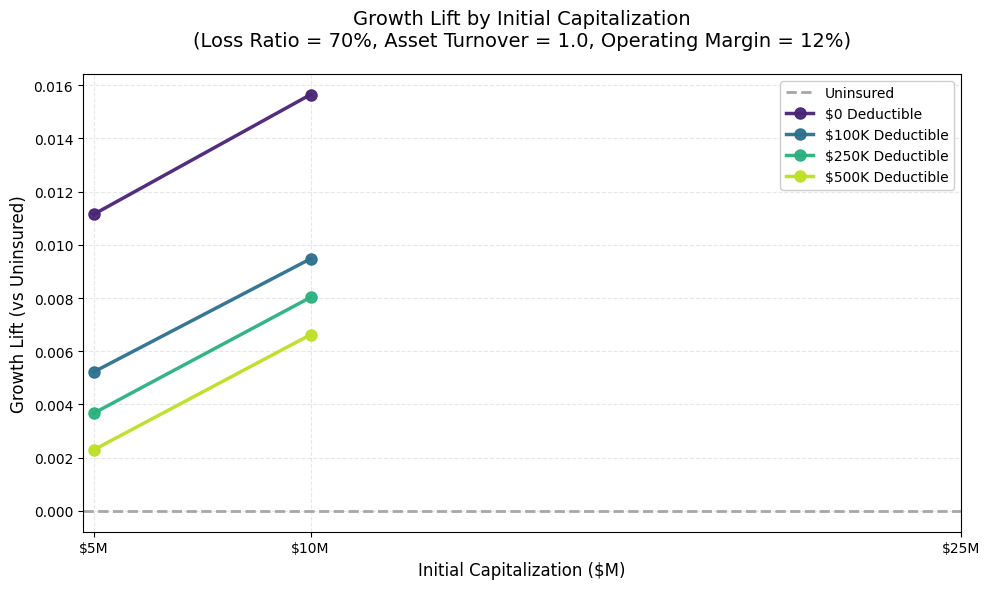

In [19]:
# Single line graph: Growth Lift vs Initial Capitalization
# Parameters: LR=0.7, ATR=1.0, Operating Margin=10%
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from pathlib import Path

# Filter parameters
TARGET_LR = 0.7
TARGET_ATR = 1.0
TARGET_EBIT = 0.125
TARGET_CAPS = [5_000_000, 10_000_000, 25_000_000]

# Use same color scheme as previous visualizations
ded_uni = sorted(np.unique([s["ded"] for s in sc_list if not s["noins"] and np.isfinite(s["lr"])]))
cmap = plt.cm.viridis
ded_colors = cmap(np.linspace(0.1, 0.9, max(1, len(ded_uni))))

# Build baseline map for uninsured scenarios
baseline_by_cap = {}  # baseline_by_cap[cap] = growth_rate
for s in sc_list:
    if (s["noins"] 
        and np.isclose(s["atr"], TARGET_ATR, atol=1e-3)
        and np.isclose(s["ebit"], TARGET_EBIT, atol=1e-6)):
        baseline_by_cap[s["cap"]] = s["gr"]

# Collect data for each deductible level
data_by_ded = {}  # data_by_ded[ded] = [(cap, growth_lift), ...]

for ded_val in ded_uni:
    caps_list = []
    lifts_list = []
    
    for cap in TARGET_CAPS:
        # Find matching scenario
        for s in sc_list:
            if (not s["noins"]
                and np.isfinite(s["lr"]) and np.isclose(s["lr"], TARGET_LR, atol=1e-3)
                and np.isclose(s["cap"], cap, atol=1e-3)
                and np.isclose(s["atr"], TARGET_ATR, atol=1e-3)
                and np.isclose(s["ebit"], TARGET_EBIT, atol=1e-6)
                and np.isclose(s["ded"], ded_val, atol=1e-3)):
                
                # Calculate growth lift
                if cap in baseline_by_cap:
                    baseline_gr = baseline_by_cap[cap]
                    lift = s["gr"] - baseline_gr
                    caps_list.append(cap)
                    lifts_list.append(lift)
                    break
    
    if caps_list:
        data_by_ded[ded_val] = (np.array(caps_list), np.array(lifts_list))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot uninsured baseline (zero lift)
ax.axhline(0.0, color="gray", lw=2.0, ls="--", alpha=0.7, label="Uninsured", zorder=1)

# Plot each deductible level
for i, (ded_val, (caps, lifts)) in enumerate(sorted(data_by_ded.items())):
    color = ded_colors[ded_uni.index(ded_val)]
    
    # Sort by cap for clean line
    order = np.argsort(caps)
    caps_sorted = caps[order]
    lifts_sorted = lifts[order]
    
    # Format label
    if ded_val >= 1_000_000:
        label = f"${ded_val/1_000_000:.0f}M Deductible"
    elif ded_val >= 1_000:
        label = f"${ded_val/1_000:.0f}K Deductible"
    else:
        label = f"${ded_val:.0f} Deductible"
    
    ax.plot(caps_sorted / 1_000_000, lifts_sorted, 
           color=color, lw=2.5, alpha=0.95, 
           marker='o', ms=8, label=label, zorder=3)

# Formatting
ax.set_xlabel("Initial Capitalization ($M)", fontsize=12)
ax.set_ylabel("Growth Lift (vs Uninsured)", fontsize=12)
ax.set_title("Growth Lift by Initial Capitalization\n" + 
            f"(Loss Ratio = {TARGET_LR:.0%}, Asset Turnover = {TARGET_ATR:.1f}, Operating Margin = {TARGET_EBIT:.0%})",
            fontsize=14, pad=20)

# Grid and styling
ax.grid(True, alpha=0.3, linestyle='--')
ax.tick_params(labelsize=10)

# Legend
ax.legend(loc='best', frameon=True, fontsize=10, framealpha=0.95)

# Format x-axis to show capitalization values
ax.set_xticks([cap / 1_000_000 for cap in TARGET_CAPS])
ax.set_xticklabels([f"${cap/1_000_000:.0f}M" for cap in TARGET_CAPS])

plt.tight_layout()

# Save figure
output_dir = Path("output")
output_dir.mkdir(parents=True, exist_ok=True)
out_path = output_dir / "growth_lift_by_capitalization.png"
fig.savefig(out_path, dpi=300, bbox_inches='tight')
print(f"Saved: {out_path}")

plt.show()

## Build Dashboard Cache

Build comprehensive cache for interactive EDA dashboards (Space Explorer and Paired Path Browser).
This extracts time-series percentiles, distribution data, interesting simulation IDs, and CRN pairing maps.

In [20]:
import pickle
import numpy as np
from pathlib import Path
from tqdm.auto import tqdm
from time import perf_counter

dashboard_cache_file = r"cache\dashboard_cache.pkl"
Path(dashboard_cache_file).parent.mkdir(parents=True, exist_ok=True)

PERCENTILE_LEVELS = [5, 10, 25, 50, 75, 90, 95]
QUANTILE_LEVELS = np.linspace(0, 1, 1001)

try:
    with open(dashboard_cache_file, "rb") as f:
        dashboard_cache = pickle.load(f)
    if len(dashboard_cache.get("configs", {})) == 0:
        raise ValueError("Empty cache, rebuilding.")
    print(f"Loaded dashboard cache with {len(dashboard_cache['configs'])} configs")
except Exception as e:
    print(f"Building dashboard cache (cache miss: {e})")

    dashboard_cache = {
        "version": 1,
        "results_dir": str(results_dir),
        "configs": {},
        "crn_pairs": {},
        "param_values": {},
        "percentile_levels": PERCENTILE_LEVELS,
        "quantile_levels": QUANTILE_LEVELS,
    }

    start = perf_counter()
    for idx, path in enumerate(tqdm(pkl_paths, desc="Building dashboard cache")):
        key = path.stem
        try:
            with open(path, "rb") as f:
                data = pickle.load(f)

            params = parse_config_key(key)
            n_sims = len(data.growth_rates)
            n_years = data.config.n_years
            initial_assets = params.get("Cap", 0)

            # Time-series percentiles: shape (n_years, n_percentiles)
            ts_losses = np.percentile(data.annual_losses, PERCENTILE_LEVELS, axis=0).T
            ts_recoveries = np.percentile(data.insurance_recoveries, PERCENTILE_LEVELS, axis=0).T
            ts_retained = np.percentile(data.retained_losses, PERCENTILE_LEVELS, axis=0).T

            # Fine-grained distribution quantiles for smooth KDE-like plots
            gr_qs = np.quantile(data.growth_rates, QUANTILE_LEVELS)
            fa_qs = np.quantile(data.final_assets, QUANTILE_LEVELS)

            # Identify interesting simulation IDs for the Paired Path Browser
            interesting = {}

            # Catastrophic: sims with any single-year loss > $2M
            max_annual = data.annual_losses.max(axis=1)
            catastrophic_mask = max_annual > 2_000_000
            catastrophic_ids = np.where(catastrophic_mask)[0]
            interesting["catastrophic"] = catastrophic_ids[:100].tolist()

            # Near-ruin: bottom 1% of surviving sims by final assets
            insolvency_tol = getattr(data.config, "insolvency_tolerance", 10_000)
            survived_mask = data.final_assets > insolvency_tol
            if survived_mask.sum() > 0:
                survived_assets = data.final_assets[survived_mask]
                threshold_1pct = np.percentile(survived_assets, 1)
                near_ruin_mask = survived_mask & (data.final_assets <= threshold_1pct)
                interesting["near_ruin"] = np.where(near_ruin_mask)[0][:50].tolist()
            else:
                interesting["near_ruin"] = []

            # Median: sims closest to median final assets
            median_fa = np.median(data.final_assets)
            dist_to_median = np.abs(data.final_assets - median_fa)
            interesting["median"] = np.argsort(dist_to_median)[:20].tolist()

            # Best: top 1% by final assets
            best_threshold = np.percentile(data.final_assets, 99)
            interesting["best"] = np.where(data.final_assets >= best_threshold)[0][:50].tolist()

            # Worst surviving: bottom 5% of survivors
            if survived_mask.sum() > 0:
                threshold_5pct = np.percentile(data.final_assets[survived_mask], 5)
                worst_surv_mask = survived_mask & (data.final_assets <= threshold_5pct)
                interesting["worst_surviving"] = np.where(worst_surv_mask)[0][:50].tolist()
            else:
                interesting["worst_surviving"] = []

            # Ruined: sims that went insolvent
            ruined_mask = ~survived_mask
            interesting["ruined"] = np.where(ruined_mask)[0][:100].tolist()

            dashboard_cache["configs"][key] = {
                "Cap": params.get("Cap"),
                "ATR": params.get("ATR"),
                "EBITABL": params.get("EBITABL"),
                "Ded": params.get("Ded"),
                "LR": params.get("LR"),
                "Vol": params.get("Vol"),
                "NOINS": params.get("NOINS", False),
                "XS_Kurt": params.get("XS_Kurt"),
                "n_sims": n_sims,
                "n_years": n_years,
                "initial_assets": initial_assets,
                "growth_rate_mean": float(data.growth_rates.mean()),
                "growth_rate_median": float(np.median(data.growth_rates)),
                "growth_rate_std": float(data.growth_rates.std()),
                "final_assets_mean": float(data.final_assets.mean()),
                "final_assets_median": float(np.median(data.final_assets)),
                "ruin_probability": {int(k) if str(k).isdigit() else k: float(v)
                                     for k, v in data.ruin_probability.items()},
                "ts_annual_losses_pctiles": ts_losses,
                "ts_insurance_recoveries_pctiles": ts_recoveries,
                "ts_retained_losses_pctiles": ts_retained,
                "growth_rate_qs": gr_qs,
                "final_assets_qs": fa_qs,
                "interesting_sims": interesting,
            }
        except Exception as ex:
            print(f"  Skipping {path.name}: {ex}")

    # Build CRN pairing map: insured_key -> noins_key
    insured_cfgs = {k: v for k, v in dashboard_cache["configs"].items() if not v.get("NOINS")}
    noins_cfgs = {k: v for k, v in dashboard_cache["configs"].items() if v.get("NOINS")}

    for ins_key, ins_cfg in insured_cfgs.items():
        for ni_key, ni_cfg in noins_cfgs.items():
            if (ins_cfg["Cap"] == ni_cfg["Cap"]
                and ins_cfg["ATR"] == ni_cfg["ATR"]
                and abs((ins_cfg["EBITABL"] or 0) - (ni_cfg["EBITABL"] or 0)) < 1e-6
                and abs((ins_cfg["Vol"] or 0) - (ni_cfg["Vol"] or 0)) < 1e-6):
                dashboard_cache["crn_pairs"][ins_key] = ni_key
                break

    # Collect unique parameter values (insured configs only)
    ins_cfgs_list = [v for v in dashboard_cache["configs"].values() if not v.get("NOINS")]
    dashboard_cache["param_values"] = {
        "Cap": sorted(set(c["Cap"] for c in ins_cfgs_list if c["Cap"] is not None)),
        "ATR": sorted(set(c["ATR"] for c in ins_cfgs_list if c["ATR"] is not None)),
        "Ded": sorted(set(c["Ded"] for c in ins_cfgs_list if c["Ded"] is not None)),
    }

    elapsed = perf_counter() - start
    print(f"\nBuilt dashboard cache in {elapsed:.1f}s:")
    print(f"  {len(dashboard_cache['configs'])} configs total")
    print(f"  {len(insured_cfgs)} insured, {len(noins_cfgs)} NOINS")
    print(f"  {len(dashboard_cache['crn_pairs'])} CRN pairs")

    with open(dashboard_cache_file, "wb") as f:
        pickle.dump(dashboard_cache, f, protocol=pickle.HIGHEST_PROTOCOL)
    print(f"  Saved to {dashboard_cache_file}")

Building dashboard cache (cache miss: [Errno 2] No such file or directory: 'cache\\dashboard_cache.pkl')


Building dashboard cache:   0%|          | 0/52 [00:00<?, ?it/s]


Built dashboard cache in 115.4s:
  52 configs total
  30 insured, 22 NOINS
  28 CRN pairs
  Saved to cache\dashboard_cache.pkl


In [21]:
# Verify dashboard cache contents
print(f"Dashboard cache version: {dashboard_cache['version']}")
print(f"Results dir: {dashboard_cache['results_dir']}")
print(f"Total configs: {len(dashboard_cache['configs'])}")
print(f"CRN pairs: {len(dashboard_cache['crn_pairs'])}")
print(f"\nParameter values:")
for k, v in dashboard_cache["param_values"].items():
    print(f"  {k}: {v}")

n_insured = sum(1 for c in dashboard_cache["configs"].values() if not c.get("NOINS"))
n_noins = sum(1 for c in dashboard_cache["configs"].values() if c.get("NOINS"))
print(f"\nInsured configs: {n_insured}")
print(f"NOINS configs: {n_noins}")

# Show sample config structure
sample_key = next(k for k, v in dashboard_cache["configs"].items() if not v.get("NOINS"))
sample = dashboard_cache["configs"][sample_key]
print(f"\nSample config: {sample_key}")
print(f"  Cap={sample['Cap']}, ATR={sample['ATR']}, Ded={sample['Ded']}")
print(f"  n_sims={sample['n_sims']}, n_years={sample['n_years']}")
print(f"  growth_rate_mean={sample['growth_rate_mean']:.6f}")
print(f"  ts_annual_losses shape: {sample['ts_annual_losses_pctiles'].shape}")
print(f"  growth_rate_qs shape: {sample['growth_rate_qs'].shape}")
print(f"  Interesting sims: {', '.join(f'{k}={len(v)}' for k, v in sample['interesting_sims'].items())}")
print(f"\nCRN pair example: {sample_key[:40]}...")
if sample_key in dashboard_cache["crn_pairs"]:
    print(f"  -> {dashboard_cache['crn_pairs'][sample_key][:40]}...")

Dashboard cache version: 1
Results dir: D:\2026-01-31 Vol
Total configs: 52
CRN pairs: 28

Parameter values:
  Cap: [5000000, 10000000, 25000000]
  ATR: [0.8, 1, 1.2]
  Ded: [0, 100000, 250000, 500000]

Insured configs: 30
NOINS configs: 22

Sample config: Cap (10M) -    ATR (0.8) -    EBITABL (0.125) -    XS_Kurt (211139) -    Ded (500K) -    LR (0.7) -    Vol (0.15) -    250K Sims -    50 Yrs
  Cap=10000000, ATR=0.8, Ded=500000
  n_sims=250000, n_years=50
  growth_rate_mean=0.011384
  ts_annual_losses shape: (50, 7)
  growth_rate_qs shape: (1001,)
  Interesting sims: catastrophic=100, near_ruin=50, median=20, best=50, worst_surviving=50, ruined=0

CRN pair example: Cap (10M) -    ATR (0.8) -    EBITABL (0...
  -> Cap (10M) -    ATR (0.8) -    EBITABL (0...
